In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap
from pathlib import Path

sys.path.append("..")

In [2]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)
from plot import get_colormap

In [3]:
# delete_all()

In [4]:
particle: int | None = 1000
ensemble: int | None = 1000
sampling: int | None = 100
slope: float | None = None
Lambda: float | None = None
degree: int | None = 4
tau = 1.0
Da = 1.0
T = 0.001

df = load_result(conditions=get_conditions(
    N_particle = particle,
    N_ensemble = ensemble,
    velocity = None,
    slope = slope,
    Lambda = Lambda,
    boundary = 5.0,
    N_bins = None,
    gamma = 1.0,
    temperature = T,
    tau = tau,
    Da = Da,
    delta_t = 0.001,
    initial = None,
    sampling = None,
    interval = None,
    degree = degree,
    )
)

# df = df[(df["velocity"] >= 0.01) & (df["velocity"] <= 0.1)]
# df[(df["slope"] >= 0.3)]
df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,interval,degree,drag,std,time
29,2667a3,1000,1000,0.001000,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,1.655,1.417724,12278.307511
46,438ca3,1000,1000,0.001259,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,-3.037,1.451354,12347.967867
35,2d250e,1000,1000,0.001585,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,0.746,1.440000,12364.718736
154,fecd90,1000,1000,0.001995,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,0.700,1.444854,12256.784873
1,03c93d,1000,1000,0.002512,0.1,5.0,100,1.0,0.1,0.001,1.0,1.0,0.001,10000,100,1000,4,1.031,1.404834,12361.394017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,a90db4,1000,1000,0.398100,0.5,5.0,100,1.0,0.5,0.001,1.0,1.0,0.001,10000,100,1000,4,12282.478,7.847992,13802.857489
75,74cbc7,1000,1000,0.501200,0.5,5.0,100,1.0,0.5,0.001,1.0,1.0,0.001,10000,100,1000,4,14555.905,7.548560,13760.404554
36,2d7f09,1000,1000,0.631000,0.5,5.0,100,1.0,0.5,0.001,1.0,1.0,0.001,10000,100,1000,4,16754.694,7.671880,5168.998565
80,875280,1000,1000,0.794300,0.5,5.0,100,1.0,0.5,0.001,1.0,1.0,0.001,10000,100,1000,4,18484.467,6.915079,5170.056567


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['2667a3', '438ca3', '2d250e', 'fecd90', '03c93d', '46b649', '7aebdf', '134203', '5e40b2', '1f86c0', '2407ca', '36b926', '88a5a3', '22e43e', 'b11e08', '316935', '5bc670', '6c9f11', '55dd6f', 'b1ebe2', '111e7a', '9f2576', '153819', 'c5aef8', '557f32', '20e8c2', 'f113c5', 'd9f7af', '76bd47', '590d8a', 'c9b5a2', '1e12e4', '8a4d91', 'd5b005', '9ceb99', '1b8289', 'a32ea5', '4668a9', '7436ee', 'cd5561', '209927', '895bea', '3e0c92', 'cdb9df', 'c83254', 'ebce1c', '42f5f3', 'cece7b', 'c536bb', 'd018c2', '7a2ec9', 'f2125a', '298071', 'f7e27d', 'f173e8', '740fd5', '3cd54a', 'dafc08', '4b6516', 'b3d3c2', '20bbab', '32f9a3', '6044d3', 'f74c2c', '8df57a', 'c2905b', '965baa', 'f583e3', '286a98', '2a8212', 'd8d47b', '462bd2', '1504f4', '98709b', '57b226', 'ee5362', '8c74bf', 'd2058b', 'd8d5bf', '1c2b55', '496fbf', '0d4989', 'f28bfc', '3a32f3', 'b0578d', 'c17701', 'b913c2', 'f8740e', 'b873dc', '46798c', '6f3b66', '461c14', '4a5a2d', 'b7d4e6', '9a272a', 'b58bee', '262e16', '0adcb0', 'e8b340', '21e6be',

In [6]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")

available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0])
# available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
print(f"velocity = {available_velocity}")

data = 5 x 5 x 31 = 775
slope = [0.1, 0.2, 0.3, 0.4, 0.5]
Lambda = [0.1, 0.2, 0.3, 0.4, 0.5]
velocity = [0.001    0.001259 0.001585 0.001995 0.002512 0.003162 0.003981 0.005012
 0.00631  0.007943 0.01     0.01259  0.01585  0.01995  0.02512  0.03162
 0.03981  0.05012  0.0631   0.07943  0.1      0.1259   0.1585   0.1995
 0.2512   0.3162   0.3981   0.5012   0.631    0.7943   1.      ]


In [7]:
drag, std = [], []

for velocity in available_velocity:
    drag.append(get_drag_by_velocity(df, velocity=velocity))
    std.append(get_std_by_velocity(df, velocity=velocity))

drag, std = np.array(drag), np.array(std)
print(drag.shape)

# nrows, ncols = 4, 4

# fig, axs = plt.subplots(nrows, ncols, figsize=(15,12))

# for i in range(nrows):
#     for j in range(ncols):
#         ax = axs[i,j]
#         ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}", fontsize=25)
#         ax.set_xlabel("velocity", fontsize=20)
#         ax.set_ylabel("drag", fontsize=20)
#         ax.plot(available_velocity, drag[:,i,j])
#         ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
#         ax.axhline(0, linestyle="--", color="black")
#         ax.set_xscale("log")
#         # ax.set_xlim([0, 0.01])
#         # ax.set_ylim([None, 1e6])

# fig.tight_layout()
# # plt.savefig(f"fig/drag ptcl={particle} ensemble={ensemble} variable={len(available_Lambda)*len(available_slope)}.jpg")
# plt.show()

(31, 5, 5)


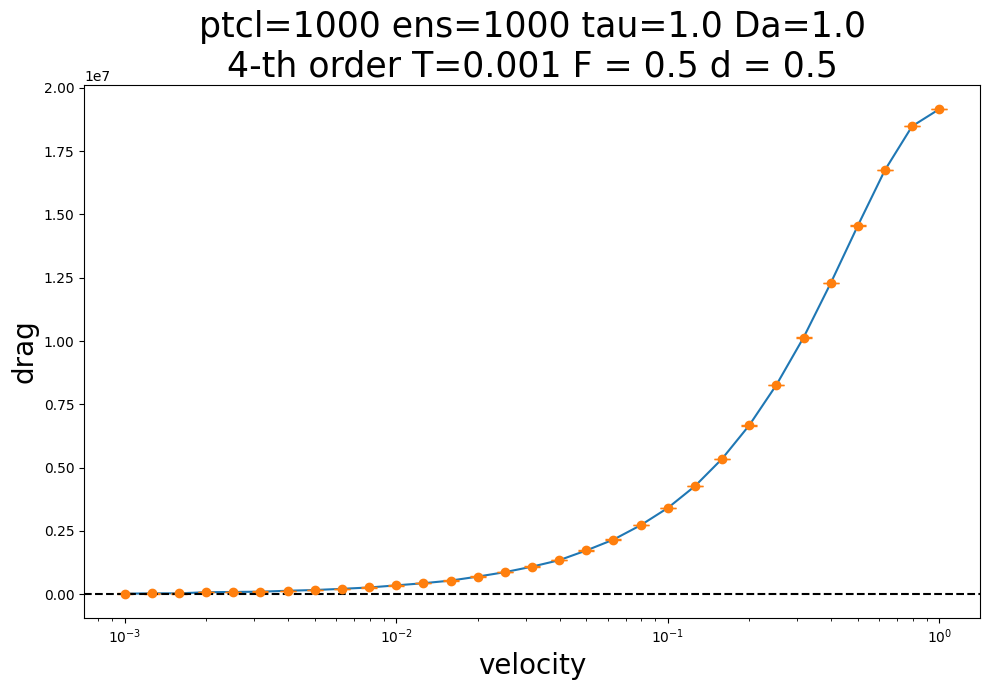

In [22]:
fig, ax = plt.subplots(figsize=(10,7))

f, d = 0.5, 0.5

i, j = available_slope.index(f), available_Lambda.index(d)

ax.set_title(f"ptcl={particle} ens={ensemble} tau={tau} Da={Da}\n{degree}-th order T={T} F = {available_slope[i]} d = {available_Lambda[j]}", fontsize=25)
ax.set_xlabel("velocity", fontsize=20)
ax.set_ylabel("drag", fontsize=20)
ax.plot(available_velocity, drag[:,i,j])
ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
ax.axhline(0, linestyle="--", color="black")
ax.set_xscale("log")
# ax.set_xlim([0, 0.01])
# ax.set_ylim([None, 1e6])

fig.tight_layout()
Path(f"fig/{degree}/drag_by_velocity").mkdir(parents=True, exist_ok=True)
plt.savefig(f"fig/{degree}/drag_by_velocity/ptcl={particle} ens={ensemble} f={f} d={d}.jpg")
plt.show()

In [9]:
# # available_slope, available_Lambda, available_velocity = sorted(
# #     set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
# # print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
# # print(f"slope = {available_slope}")
# # print(f"Lambda = {available_Lambda}")

# available_slope = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]
# available_Lambda = [0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0]

# # available_velocity = np.array([0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0])
# available_velocity = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
# # print(f"velocity = {available_velocity}")

In [10]:
# fig, axs = plt.subplots(3, 2, figsize=(15,12))
# fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity = available_velocity[i]
    
#     drag = get_drag_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()
#     # print(np.log10(drag.max()), np.log10(-drag.min()))

#     c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
#                     norm=LogNorm(vmin=1, vmax=max(1,drag.max())), cmap="binary")
#     # c = ax.pcolor(x, y, average, shading="auto",
#     #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     # ax.set_xlim([0, 1])
#     # ax.set_ylim([0, 1])

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")

#     cbar = plt.colorbar(c)

# fig.tight_layout()
# # plt.savefig(f"./fig/{potential}/drag/AOUP drag, ptcl={particle} ens={ensemble} sam={sampling}")
# plt.show()

In [11]:
# fig, axs = plt.subplots(3, 2, figsize=(15,12))
# fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity = available_velocity[i]

#     data = get_log_scale(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()

#     cvals  = [min(data.min(), -1), 0, data.max()]
#     colors = ["red","white","blue"]
#     cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

#     # c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
#     c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    
#     # if i == 5: sys.exit()

#     ax.set_title(f"velocity v={np.round(velocity, 3)}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     # ax.set_xlim([1.e-1, 1.e0])|
#     # ax.set_ylim([1.e-1, 1.e0])
    
#     cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/{degree}/drag/AOUP drag, ptcl={particle} ens={ensemble} sam={sampling}.jpg")
# plt.show()

In [12]:
# import scipy.stats

# fig, axs = plt.subplots(3, 2, figsize=(15,12))
# fig.suptitle(f"Negative drag T-test P-value, particle={particle} ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()
#     std = get_std_by_velocity(df, velocity=velocity, available_slope=available_slope, available_Lambda=available_Lambda).transpose()

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0
#     p_value = scipy.stats.norm.cdf(Z)
#     # print(p_value.min())
    
#     cvals  = [0.15, 0.16]
#     colors = ["black","white"]
#     cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                       cmap=cmap, norm=norm)

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlim([1.e-1, 1.e0])
#     ax.set_ylim([1.e-1, 1.e0])

#     # cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/{degree}/test/T-test, ptcl={particle} ens={ensemble} sam={sampling}")
# plt.show()

In [13]:
# from scipy.stats import norm

# fig, axs = plt.subplots(3, 3, figsize=(15,12))
# fig.suptitle(f"Positive drag T-test P-value, ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity)
#     std = get_std_by_velocity(df, velocity=velocity)

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0

#     p_value = 1 - norm.cdf(Z)
#     # p_value[np.isnan(p_value)] = 1.e-10
#     # print(p_value)
#     # print(p_value.min())

#     # c = ax.contourf(available_slope, available_Lambda, p_value,
#     #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                 norm=LogNorm(vmin=1.e-15, vmax=1.e-2), cmap="binary_r")

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlim([1.e-3, 1.e+1])
#     ax.set_ylim([1.e-3, 1])

#     cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/Positive Drag T-Test P-value, ensemble={ensemble}.jpg")
# plt.show()

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

In [15]:
# fig, ax = plt.subplots()
# velocity = 1.0

# drag = get_drag_by_velocity(df, velocity=velocity)
# print(np.log10(drag.max()), np.log10(-drag.min()))

# cvals  = [1, drag.max()]
# colors = ["white", "black"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
#                   norm=norm, cmap=cmap)

# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# ax.set_title(f"AOUP drag, velocity={velocity}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")

# cbar = plt.colorbar(c)
# plt.show()

In [16]:
# fig, ax = plt.subplots()

# data = get_log_scale(df, velocity=velocity)

# cvals  = [data.min(), 0, data.max()]
# colors = ["red","white","blue"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

# c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# # c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

# ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()

In [17]:
# drag = get_drag_by_velocity(df, velocity=velocity)
# std = get_std_by_velocity(df, velocity=velocity)

# Z = drag / std
# Z[np.isnan(Z)] = 0.0

# p_value = scipy.stats.norm.cdf(Z)
# # print(p_value)
# print(p_value.min())

# fig, ax = plt.subplots()

# cvals = [1.e-4, 1]
# colors = ["black", "white"]
# cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# # c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
# #                norm=norm, cmap=cmap)
# c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                norm=norm, cmap=cmap)

# ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
# ax.set_xlabel(rf"Force $f$")
# ax.set_ylabel(rf"Size $\lambda$")
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_xlim([1.e-3, 1.e+1])
# ax.set_ylim([1.e-3, 1])

# cbar = plt.colorbar(c)
# # plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
# plt.show()